In [1]:
!wget https://www.dropbox.com/s/cnn872sa9ggucat/titanic.zip?dl=0

--2020-08-26 17:47:12--  https://www.dropbox.com/s/cnn872sa9ggucat/titanic.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/cnn872sa9ggucat/titanic.zip [following]
--2020-08-26 17:47:12--  https://www.dropbox.com/s/raw/cnn872sa9ggucat/titanic.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd5d42b8c65f1f0d8a7bfbfa67e.dl.dropboxusercontent.com/cd/0/inline/A-OU7cNQ78mnXuY1B_oO9NuE7v66t0_I1HKCyPylqVpV8QJO_-a2PU32K_CZpErL1rx1TzMHXTSwRPmpoiSHaGkdy1Fc67s5uJl5CcSHYjr9F9TZAKbGQGn5FwKMShT3Gf4/file# [following]
--2020-08-26 17:47:13--  https://ucd5d42b8c65f1f0d8a7bfbfa67e.dl.dropboxusercontent.com/cd/0/inline/A-OU7cNQ78mnXuY1B_oO9NuE7v66t0_I1HKCyPylqVpV8QJO_-a2PU32K_CZpErL1rx1TzMHXTSwRPmpoiSHaGkdy1Fc67s5uJl5CcSHYjr9F9TZ

In [2]:
!unzip titanic.zip?dl=0 -d "data/"

Archive:  titanic.zip?dl=0
  inflating: data/gender_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('/content/data/train.csv')

In [5]:
print(df.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [6]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
# lets see how many missing values are there in our dataset
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


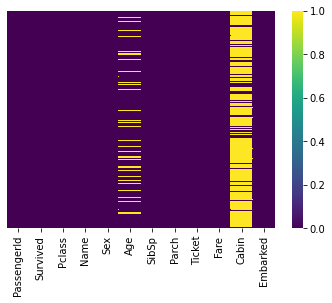

In [8]:
# visualisation will make this analysis easy
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# as we can see from the visualisation also, cabin has many null values and the number is followed by age.

In [11]:
# lets check how many people have survived and how many have not survived

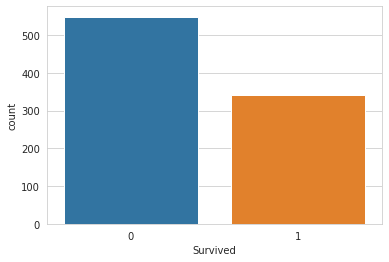

In [12]:
# As we can see from the dataset , many people have not survived.
sns.set_style('whitegrid')
sns.countplot(df['Survived'])

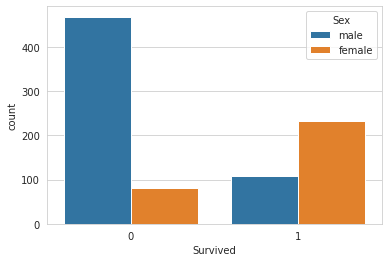

In [13]:
# lets see the survival rate wrt to sex:
# As we can see , vert less males have been survived
sns.set_style('whitegrid')
sns.countplot(df['Survived'],hue=df['Sex'])

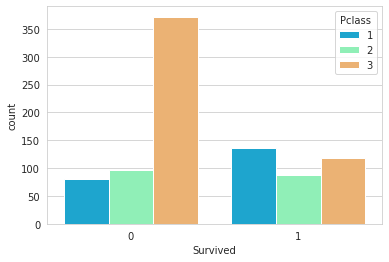

In [14]:
sns.set_style('whitegrid')
sns.countplot(df['Survived'],hue=df['Pclass'],palette='rainbow')

In [15]:
# here Pclass is class no in ship, class 1 means first class and so on 
# as we can see from the visualisation, class 1 means the person is travelleing in first class and hence 
# more security
# the observation is : many people from first class has been survived and many people from class 3 has died.

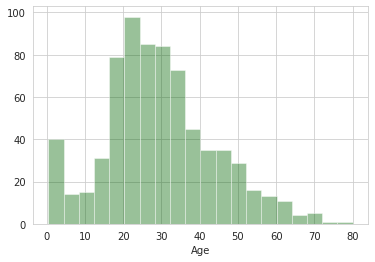

In [16]:
# lets see the distribution of age , in short, we want to figure out what is the average age of most of the 
# people that were travelling in ship
# its a kind of normal distribution as the curve would be bell shaped.
sns.distplot(df['Age'].dropna(),kde=False,color='darkgreen')

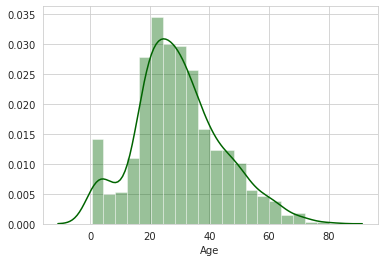

In [17]:
sns.distplot(df['Age'].dropna(),kde=True,color='darkgreen')

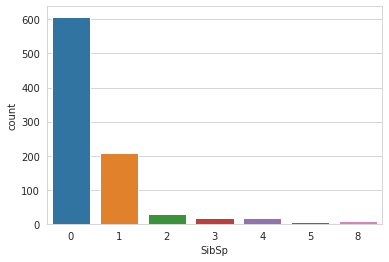

In [18]:
# lets check the count of people who are travelling with siblings and spouse
sns.countplot(df['SibSp'])

In [19]:
# 600 people are travelling with no siblings or spouse.
# 200 people are travelling with a spouse or a sibling and so on.
# Yaxis shows count

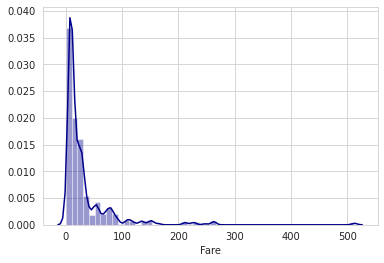

In [24]:
# lets see the average fare:
sns.distplot(df['Fare'],kde='False',color='darkblue')

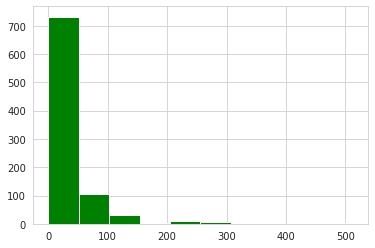

In [27]:
df['Fare'].hist(color='green')

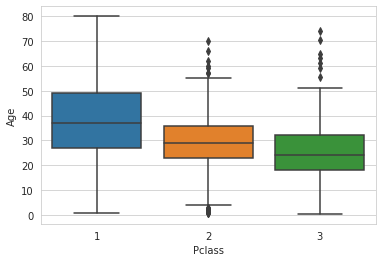

In [28]:
# now lets see the relation between age and pclass
sns.boxplot(df['Pclass'],df['Age'])

In [35]:
# lets fill the nan age values with the average value according to class
def input(col):
  age=col[0]
  pclass=col[1]
  if pd.isnull(age):
    if pclass==1:
      return 37
    elif pclass==2:
      return 29
    else:
      return 24
  else:
    return age

In [36]:
df['Age']=df[['Age','Pclass']].apply(input,axis=1)

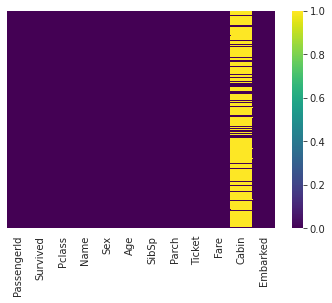

In [37]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [38]:
# now age has no null values

In [41]:
# as we can see cabin has lots and lots of null values so lets drop it:
df=df.drop(columns=['Cabin'])

In [42]:
print(df.head())

   PassengerId  Survived  Pclass  ...            Ticket     Fare  Embarked
0            1         0       3  ...         A/5 21171   7.2500         S
1            2         1       1  ...          PC 17599  71.2833         C
2            3         1       3  ...  STON/O2. 3101282   7.9250         S
3            4         1       1  ...            113803  53.1000         S
4            5         0       3  ...            373450   8.0500         S

[5 rows x 11 columns]


In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [45]:
# we will need to convert categorical features into dummy variables using pandas otherwise our machine learning
# algorithm will not be able to take inputs

In [46]:
# basically we are converting categorical features into one hot encoding nd dropping one feature to 
# avoid the risk of curse of dimensionality.
# as using 2 features, we can esily derive third feature.

In [48]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [49]:
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)
Sex=pd.get_dummies(df['Sex'],drop_first=True)

In [52]:
# we will also remove some unwanted columns like name ticket sex and embarked and sex etc
df=df.drop(columns=['Embarked','Sex','Name','Ticket'])

In [54]:
print(df.head())
print(df.shape)

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  24.0      1      0   7.2500
1            2         1       1  37.0      1      0  71.2833
2            3         1       3  24.0      0      0   7.9250
3            4         1       1  37.0      1      0  53.1000
4            5         0       3  24.0      0      0   8.0500
(891, 7)


In [55]:
df=pd.concat([df,Sex,Embarked],axis=1)

In [56]:
print(df.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  24.0      1      0   7.2500     1  0  1
1            2         1       1  37.0      1      0  71.2833     0  0  0
2            3         1       3  24.0      0      0   7.9250     0  0  1
3            4         1       1  37.0      1      0  53.1000     0  0  1
4            5         0       3  24.0      0      0   8.0500     1  0  1


In [57]:
print(df.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  24.0      1      0   7.2500     1  0  1
1            2         1       1  37.0      1      0  71.2833     0  0  0
2            3         1       3  24.0      0      0   7.9250     0  0  1
3            4         1       1  37.0      1      0  53.1000     0  0  1
4            5         0       3  24.0      0      0   8.0500     1  0  1


In [62]:
# Now our data is ready for our model
# now we will build our logistic regression model
# now first we will split our data into train and test

In [59]:
Y=df['Survived']

In [60]:
X=df.drop(columns='Survived')

In [61]:
print(X.shape,Y.shape)

(891, 9) (891,)


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [64]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(712, 9) (712,) (179, 9) (179,)


In [65]:
# Training and Prediction
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
predictions=lr.predict(X_test)

In [68]:
lr.score(X_test,Y_test)

0.7932960893854749

In [70]:
# we can see even confusion matrix
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(Y_test,predictions)

In [71]:
print(accuracy)

[[98 12]
 [25 44]]


In [72]:
from sklearn.metrics import  accuracy_score
print(accuracy_score(Y_test,predictions))

0.7932960893854749
